In [5]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')  #경고 무시

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()

In [8]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
data = boston.data
label = boston.target
columns = boston.feature_names

In [11]:
data = pd.DataFrame(data, columns=columns)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
data.shape

(506, 13)

In [16]:
#simple linear regression 간단한 선형회귀
#sklearn은 2차원 데이터만 인식함 1차원데이터, 배열을 인식하지못함 예를들어 [10,20,30]이런거
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,label, train_size =0.85, random_state=2022)
x_train['RM']


490    5.093
379    6.223
399    5.852
234    6.726
127    5.693
       ...  
177    6.315
112    5.913
173    6.416
220    6.951
381    6.545
Name: RM, Length: 430, dtype: float64

In [18]:
#rm 은 집인데 이게 1차원 데이터기 때문에 2차원 데이터로 바꿔줘야함
x_train['RM'].values.reshape(430,1)   #430개의 2차원으로 바꿈 근데 저것은 (-1,1)하고 같음.  -1이 왜 전체냐면 언더플로우가 되서 -1이 제일 큰값이 됨



array([[5.093],
       [6.223],
       [5.852],
       [6.726],
       [5.693],
       [6.794],
       [6.226],
       [5.56 ],
       [6.051],
       [5.036],
       [6.77 ],
       [5.608],
       [6.343],
       [7.206],
       [6.122],
       [7.061],
       [6.127],
       [5.95 ],
       [6.411],
       [6.405],
       [6.635],
       [5.709],
       [6.193],
       [6.312],
       [6.982],
       [6.208],
       [7.454],
       [6.315],
       [6.382],
       [5.942],
       [8.247],
       [6.604],
       [5.414],
       [7.148],
       [6.525],
       [6.38 ],
       [5.683],
       [5.871],
       [6.8  ],
       [6.162],
       [6.101],
       [6.122],
       [6.12 ],
       [7.041],
       [7.765],
       [6.606],
       [6.631],
       [6.012],
       [6.781],
       [5.927],
       [6.152],
       [6.376],
       [6.749],
       [6.301],
       [5.88 ],
       [6.174],
       [5.856],
       [6.333],
       [6.415],
       [7.61 ],
       [6.182],
       [5.935],
       [

In [20]:
x_train['RM'].values.reshape(-1,1)[:5]

#-1, 1의 비밀을 이해해야함

array([[5.093],
       [6.223],
       [5.852],
       [6.726],
       [5.693]])

In [22]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [24]:
sim_lr.fit(x_train['RM'].values.reshape((-1,1)),y_train) #룸의 개수로 학습

LinearRegression()

In [27]:
y_pred = sim_lr.predict(x_test['RM'].values.reshape(-1,1))
#룸의 개수로 예측

In [31]:
#결과 살펴보기
from sklearn.metrics import r2_score
print('단순 선형회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))

#:.4f 는 전체데이터중 소수점 4번쨰 자리까지 출력

단순 선형회귀, R2: 0.1901


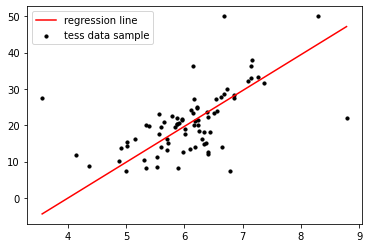

In [40]:
#결과 시각화    10은 점의 개수, x범위는 가장 방이 작은곳부터 가장 큰곳까지
line_x = np.linspace(np.min(x_test['RM']), np.max(x_test['RM']), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

plt.scatter(x_test['RM'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['regression line','tess data sample'],loc ='upper left')

In [41]:
#multiple Linear regression
mul_lr = LinearRegression()

In [47]:
mul_lr.fit(x_train,y_train)

LinearRegression()

In [49]:
y_pred = mul_lr.predict(x_test)
print('다중 선형 회귀, R2: {:.4f}'.format(r2_score(y_test, y_pred)))

다중 선형 회귀, R2: 0.6210


In [69]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=2)

In [70]:
dt_regr.fit(x_train['RM'].values.reshape((-1,1)), y_train)

DecisionTreeRegressor(max_depth=2)

In [71]:
y_pred = dt_regr.predict(x_test['RM'].values.reshape(-1,1))

In [72]:
print('단순 결정 트리 회귀 R2:',r2_score(y_test, y_pred))

단순 결정 트리 회귀 R2: 0.3533858103059573


In [73]:
arr = np.arange(1,11)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [76]:
best_depth = 0
best_r2 = 0

for depth in arr:
  dt_regr = DecisionTreeRegressor(max_depth=depth)
  dt_regr.fit(x_train['RM'].values.reshape((-1,1)), y_train)
  y_pred = dt_regr.predict(x_test['RM'].values.reshape(-1,1))
  
  temp_r2 = r2_score(y_test, y_pred)
  print('\n단순 결정 트리 회귀 depth={} R2: {:.4f}'.format(depth, temp_r2))

  if best_r2 < temp_r2:
    best_depth = depth
    best_r2 = temp_r2

print('최적의 결과는 depth={} r2={:.4f}'.format(best_depth, best_r2))


단순 결정 트리 회귀 depth=1 R2: 0.2726

단순 결정 트리 회귀 depth=2 R2: 0.3534

단순 결정 트리 회귀 depth=3 R2: 0.3967

단순 결정 트리 회귀 depth=4 R2: 0.4232

단순 결정 트리 회귀 depth=5 R2: 0.3459

단순 결정 트리 회귀 depth=6 R2: 0.3571

단순 결정 트리 회귀 depth=7 R2: 0.3793

단순 결정 트리 회귀 depth=8 R2: 0.3082

단순 결정 트리 회귀 depth=9 R2: 0.2388

단순 결정 트리 회귀 depth=10 R2: 0.2150
최적의 결과는 depth=4 r2=0.4232


In [80]:
dt_regr = DecisionTreeRegressor(max_depth=5)
dt_regr.fit(x_train, y_train)

y_pred = dt_regr.predict(x_test)
print('다중결정 트리 R2:{:.4f}'.format(r2_score(y_test, y_pred)))

다중결정 트리 R2:0.8003


In [87]:
#support vector machine regressor
from sklearn.svm import SVR
svm_regr = SVR(C=1)
svm_regr.fit(x_train['RM'].values.reshape(-1,1), y_train)
y_pred = svm_regr.predict(x_test['RM'].values.reshape(-1,1))
print('단순 서포트 백터 머신 회귀 R2: {:.4f}'.format(r2_score(y_test,y_pred)))

단순 서포트 백터 머신 회귀 R2: 0.4266


In [93]:
#결과의 시각화
line_x = np.linspace(np.min(x_test['RM']), np.max(x_test['RM']),100)
line_y = svm_regr.predict(line_x.reshape(-1,1))

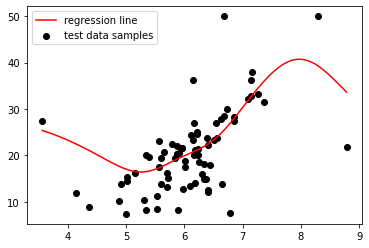

In [99]:
plt.scatter(x_test['RM'], y_test, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['regression line','test data samples'], loc='upper left')

In [102]:
svm_regr = SVR(C=20)
svm_regr.fit(x_train, y_train)
y_pred = svm_regr.predict(x_test)
print('다중 서포트 벡터 머신 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

다중 서포트 벡터 머신 회귀, R2 : 0.4086
